In [71]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
%matplotlib inline

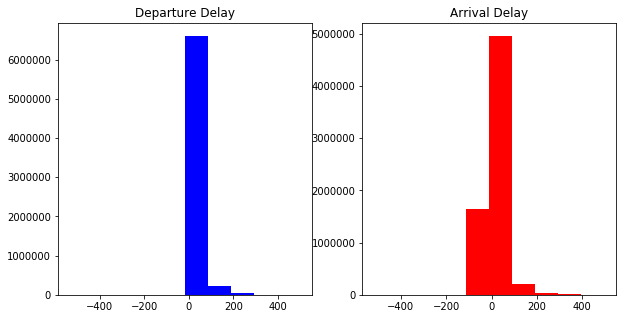

In [72]:
# flight data from 2008
flights = pd.read_csv('Desktop/Data_Science/2008.csv')

# narrow down data to flights with delay on departure and arrival under 500
DepDelay = flights.loc[lambda df: flights['DepDelay'] < 500, :]
ArrDelay = flights.loc[lambda df: flights['ArrDelay'] < 500, :]
delayDep = DepDelay['DepDelay']
delayArr = ArrDelay['ArrDelay']

# display histrogram of delays on departure and arrival
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(delayDep, color='blue')
plt.title('Departure Delay')

plt.subplot(1, 2, 2)
plt.hist(delayArr, color='red')
plt.title('Arrival Delay')

plt.show()

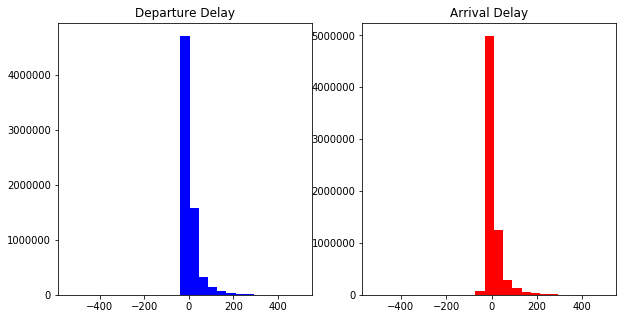

In [68]:
# display histogram of departure and arrival delays with greater detail
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(delayDep, bins=25, color='blue')
plt.title('Departure Delay')

plt.subplot(1, 2, 2)
plt.hist(delayArr, bins=25, color='red')
plt.title('Arrival Delay')

plt.show()

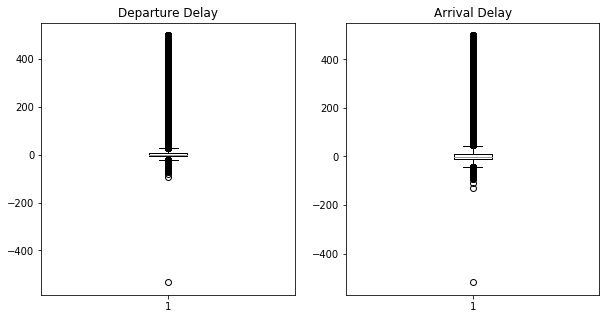

In [69]:
# boxplot of arrival and departure delays under 500
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.boxplot(delayDep)
plt.title('Departure Delay')

plt.subplot(1, 2, 2)
plt.boxplot(delayArr)
plt.title('Arrival Delay')

plt.show()

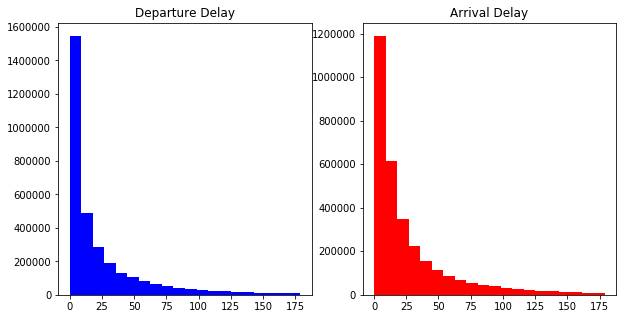

In [81]:
# select data for departure delays less than 180, excluding early departures
DepHigh = flights[lambda df: flights['DepDelay'] < 180]
DepLow = DepHigh.loc[lambda df: flights['DepDelay'] >= 0, :]
DepData = DepLow['DepDelay']

# select data for departure delays less than 180, excluding early arrivals
ArrHigh = flights[lambda df: flights['ArrDelay'] < 180]
ArrLow = ArrHigh.loc[lambda df: flights['ArrDelay'] >= 0, :]
ArrData = ArrLow['ArrDelay']

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(DepData, bins=20, color='blue')
plt.title('Departure Delay')

plt.subplot(1, 2, 2)
plt.hist(ArrData, bins=20, color='red')
plt.title('Arrival Delay')

plt.show()

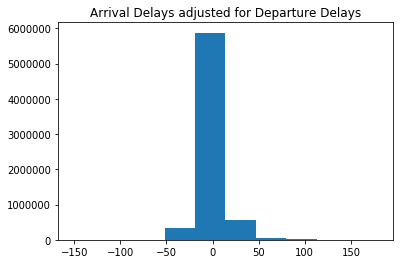

In [87]:
flights['AdjDelay'] = flights['ArrDelay'] - flights['DepDelay']
flights['AdjDelay']

AdjHigh = flights[lambda df: flights['AdjDelay'] < 180]
AdjLow = AdjHigh.loc[lambda df: flights['AdjDelay'] > -180, :]
AdjData = AdjLow['AdjDelay']

plt.hist(AdjData)
plt.title('Arrival Delays adjusted for Departure Delays')

plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


ValueError: max must be larger than min in range parameter.

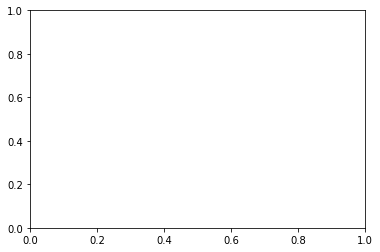

In [90]:
LateDep = flights.loc[lambda df: flights['DepDelay'] > 0, :]

plt.hist(LateDep['AdjDelay'])
plt.title('Arrival Delays on Late Departures')

plt.show()